In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_vienna_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Vienna')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/vienna_{date}.csv',index=False)
get_listings_vienna_timeseries()

In [5]:
# pull in detailed_listings
raw_df_vienna = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_vienna)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(vienna_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 11409 AirBnb listings.


In [6]:
vienna_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2020-12.csv')
vienna_raw_df_12_12_2020.shape





(12052, 16)

In [7]:
# use magic commands 'cd' to change directory
# use glob to locate all files for vienna
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_vienna = glob.glob('vienna/**.csv')
files_vienna

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['vienna/Vienna_2021-01.csv',
 'vienna/Vienna_2021-02.csv',
 'vienna/Vienna_2021-03.csv',
 'vienna/Vienna_2021-07.csv',
 'vienna/Vienna_2021-06.csv',
 'vienna/Vienna_2021-04.csv',
 'vienna/Vienna_2021-10.csv',
 'vienna/Vienna_2021-11.csv',
 'vienna/Vienna_2021-05.csv',
 'vienna/Vienna_2020-12.csv',
 'vienna/Vienna_2021-08.csv',
 'vienna/Vienna_2021-09.csv']

In [8]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

vienna_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(vienna_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(vienna_raw_df_12_12_2020['price'].mean(),2)}.")

vienna_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(vienna_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_1_9_2021['price'].mean(),2)}.")

vienna_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(vienna_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_2_8_2021['price'].mean(),2)}.")

vienna_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(vienna_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_3_4_2021['price'].mean(),2)}.")

vienna_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(vienna_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_4_9_2021['price'].mean(),2)}.")

vienna_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(vienna_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_5_19_2021['price'].mean(),2)}.")

vienna_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(vienna_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_6_3_2021['price'].mean(),2)}.")

vienna_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(vienna_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_7_4_2021['price'].mean(),2)}.")

vienna_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(vienna_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_8_6_2021['price'].mean(),2)}.")

vienna_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(vienna_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_9_7_2021['price'].mean(),2)}.")

vienna_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(vienna_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_10_6_2021['price'].mean(),2)}.")

#vienna_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(vienna_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 12052 AirBnb listings; the avg price is €82.66.
The 1_9_2021 dataset contains 11667 AirBnb listings; the avg price is €77.63.
The 2_8_2021 dataset contains 11496 AirBnb listings; the avg price is €86.12.
The 3_4_2021 dataset contains 11432 AirBnb listings; the avg price is €87.15.
The 4_9_2021 dataset contains 11477 AirBnb listings; the avg price is €83.13.
The 5_19_2021 dataset contains 11604 AirBnb listings; the avg price is €85.19.
The 6_3_2021 dataset contains 11567 AirBnb listings; the avg price is €77.15.
The 7_4_2021 dataset contains 11689 AirBnb listings; the avg price is €77.13.
The 8_6_2021 dataset contains 11625 AirBnb listings; the avg price is €79.18.
The 9_7_2021 dataset contains 11583 AirBnb listings; the avg price is €80.37.
The 10_6_2021 dataset contains 11294 AirBnb listings; the avg price is €81.1.


In [9]:
df_list_vienna = [vienna_raw_df_12_12_2020, vienna_raw_df_1_9_2021, vienna_raw_df_2_8_2021,
           vienna_raw_df_3_4_2021, vienna_raw_df_4_9_2021, vienna_raw_df_5_19_2021, vienna_raw_df_6_3_2021, vienna_raw_df_7_4_2021,
           vienna_raw_df_8_6_2021, vienna_raw_df_9_7_2021, vienna_raw_df_10_6_2021]

dates_vienna = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_vienna = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_vienna = []

def airbnb_parse_vienna(df_list, files):
    for file in files_vienna:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_{file}.csv")
        print(f"The {file} vienna dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_vienna(df_list, dates):
    for file in files_vienna:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_vienna.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_vienna)

vienna_parse = airbnb_parse_vienna(df_list_vienna, files_vienna)


The 2020-12 vienna dataset contains 12052 AirBnb listings -- the avg price is €82.66.
The 2021-01 vienna dataset contains 11667 AirBnb listings -- the avg price is €77.63.
The 2021-02 vienna dataset contains 11496 AirBnb listings -- the avg price is €86.12.
The 2021-03 vienna dataset contains 11432 AirBnb listings -- the avg price is €87.15.
The 2021-04 vienna dataset contains 11477 AirBnb listings -- the avg price is €83.13.
The 2021-05 vienna dataset contains 11604 AirBnb listings -- the avg price is €85.19.
The 2021-06 vienna dataset contains 11567 AirBnb listings -- the avg price is €77.15.
The 2021-07 vienna dataset contains 11689 AirBnb listings -- the avg price is €77.13.
The 2021-08 vienna dataset contains 11625 AirBnb listings -- the avg price is €79.18.
The 2021-09 vienna dataset contains 11583 AirBnb listings -- the avg price is €80.37.
The 2021-10 vienna dataset contains 11294 AirBnb listings -- the avg price is €81.1.


In [10]:
vienna_summary = airbnb_to_frame_vienna(df_list_vienna, files_vienna)
vienna_summary['Date of scrape'] = pd.to_datetime(vienna_summary['Date of scrape'])
vienna_summary['City'] = 'Vienna'
vienna_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,12052,82.66,55.5,0,9270,1.15,Vienna
1,2021-01-01,11667,77.63,54.0,0,9270,1.11,Vienna
2,2021-02-01,11496,86.12,55.0,0,10020,1.06,Vienna
3,2021-03-01,11432,87.15,55.0,0,10020,1.03,Vienna
4,2021-04-01,11477,83.13,55.0,0,10020,1.00,Vienna
5,2021-05-01,11604,85.19,55.0,0,10050,0.97,Vienna
6,2021-06-01,11567,77.15,56.0,0,9270,1.04,Vienna
7,2021-07-01,11689,77.13,58.0,0,9270,1.06,Vienna
8,2021-08-01,11625,79.18,59.0,0,9270,1.15,Vienna
9,2021-09-01,11583,80.37,59.0,0,9999,1.23,Vienna


In [11]:
master_df_vienna = pd.concat(df_list_vienna)
master_df_vienna_unique = master_df_vienna.drop_duplicates(subset='id')
master_df_vienna_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15883,b&b near Old Danube river,62142,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,113,1,11,2020-02-19,0.16,4,359,NaN,NaN
1,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,48,3,324,2020-10-10,2.73,3,151,NaN,NaN
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,165,1,155,2020-08-18,1.23,15,306,NaN,NaN
3,51287,little studio- next to citycenter- wifi- nice area,166283,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,61,3,309,2020-10-31,2.57,3,149,NaN,NaN
4,70568,apartment2rent - UNO City - Danube,358163,Georg,NaN,Donaustadt,48.22224,16.42460,Entire home/apt,59,3,10,2016-10-03,0.08,5,365,NaN,NaN


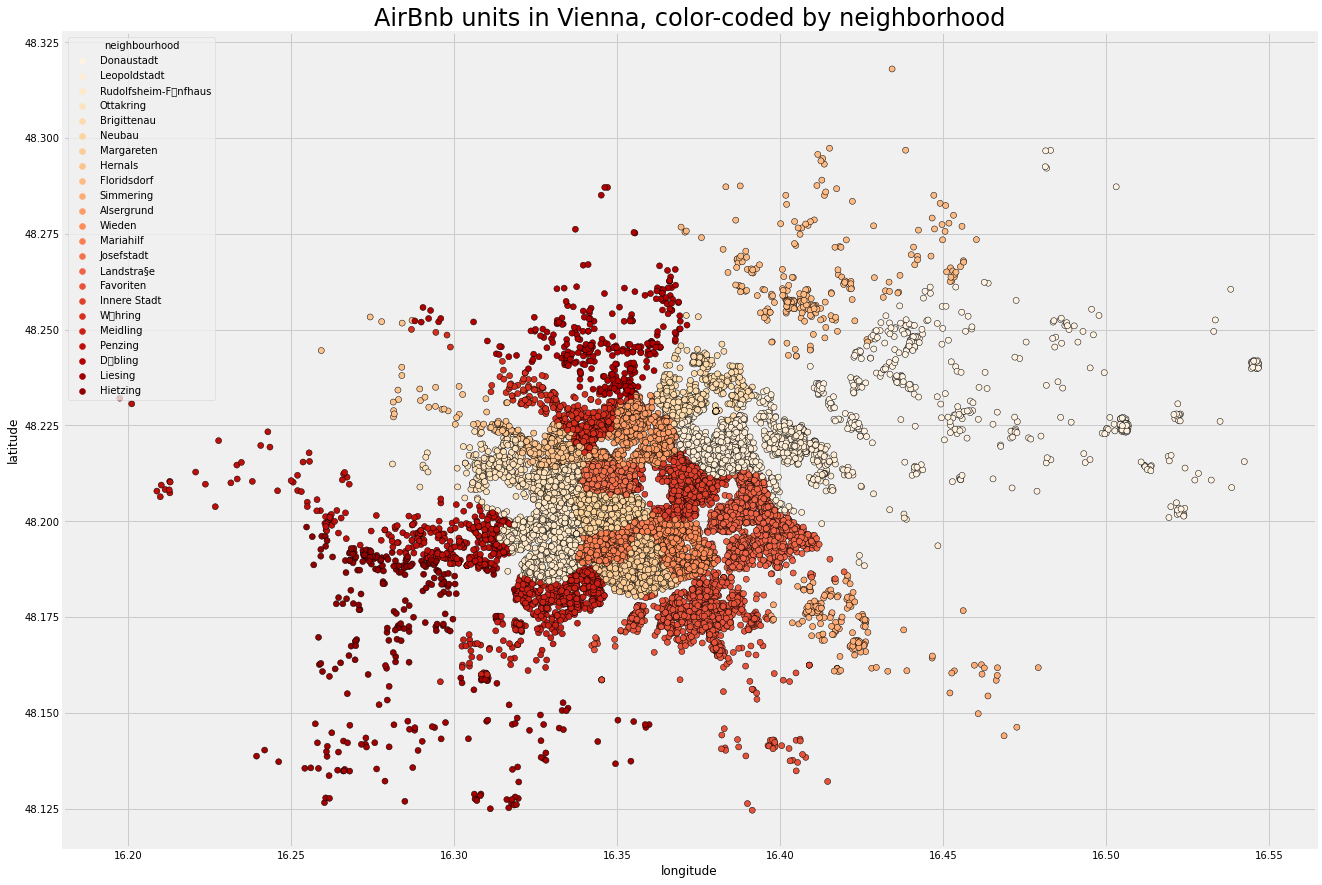

In [12]:
title = 'AirBnb units in Vienna, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_vienna_unique.longitude, master_df_vienna_unique.latitude, hue = master_df_vienna_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_vienna.png')
plt.show()

## Add review data through a join

In [13]:
df_reviews = pd.concat([vienna_raw_df_10_6_2021,raw_df_vienna],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,15883.0,b&b near Old Danube river,62142.0,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,120.0,...,4.86,4.93,4.93,4.86,4.71,4.50,f,1,0,0
1,38768.0,central cityapartement- wifi- nice neighbourhood,166283.0,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,66.0,...,4.80,4.66,4.91,4.93,4.74,4.70,t,3,0,0
2,40625.0,"Near Palace Schönbrunn, Apt. 1",175131.0,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,132.0,...,4.91,4.87,4.90,4.93,4.59,4.73,f,14,1,0
3,51287.0,little studio- next to citycenter- wifi- nice area,166283.0,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,58.0,...,4.76,4.51,4.92,4.95,4.86,4.56,t,3,0,0
4,70637.0,Flat in the Center with Terrace,358842.0,Elxe,NaN,Leopoldstadt,48.21760,16.38018,Private room,50.0,...,4.74,4.68,4.80,4.75,4.81,4.71,f,1,2,0
5,75471.0,nice big apartment with balcony,363315.0,Wolfgang,NaN,Ottakring,48.22207,16.31594,Entire home/apt,77.0,...,4.94,4.71,4.94,4.96,4.40,4.73,t,1,0,0
6,75500.0,Lovely Viennese apartment (2-4 p.),400857.0,Sabine,NaN,Brigittenau,48.23493,16.36752,Entire home/apt,65.0,...,4.67,4.67,4.67,4.67,4.08,4.42,f,1,0,0
7,90247.0,Beautiful New Central Apartment,489611.0,Diana,NaN,Neubau,48.20599,16.34890,Entire home/apt,98.0,...,4.93,4.93,4.90,4.87,4.81,4.83,t,2,0,0
8,98210.0,CIty Center Zimmer mit eigener privaten Dusche,518644.0,Michael,NaN,Margareten,48.19388,16.35859,Private room,30.0,...,4.64,4.78,4.73,4.79,4.78,4.66,f,6,13,0
9,109679.0,"Near Palace Schönbrunn, Apt. 4",175131.0,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18467,16.32795,Entire home/apt,51.0,...,4.87,4.92,4.91,4.91,4.62,4.83,t,14,1,0


## Regression

In [14]:
#df_reviews_.columns

In [15]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [16]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  39.45040651334012
Coefficients:  [-0.9806406   4.2129981  -0.40941537 -0.01696     2.87281526  6.71504057
 -8.11689162  4.86198683  2.16813922]
LinearRegression()


In [17]:
y_pred2 = regr.predict(X_)

In [18]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
7804,400.0,79.067395,-320.932605
3994,399.0,79.706757,-319.293243
7322,399.0,80.512382,-318.487618
7803,400.0,82.007238,-317.992762
4994,400.0,87.482762,-312.517238


<function matplotlib.pyplot.ylim(*args, **kwargs)>

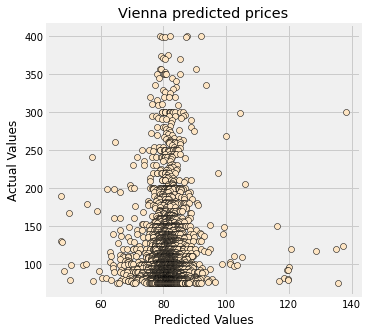

In [19]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Vienna predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim